<a href="https://www.kaggle.com/code/danielebaldoni/a-simple-approach-for-beginners?scriptVersionId=98550825" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2021/train.csv
/kaggle/input/tabular-playground-series-jan-2021/test.csv



<h1 style='background:#26A2AB; border:0; color:black'><center>Our job will be structured in this way:</center></h1> 



1) First of all let's read the datasets of training and test and visualize it to have in a glance the first idea of what our datasets consists in.

2) Make some data cleaning searching if we have outliers and missing values and than make some feature engineering if we found something strange.

3) Using some visualizations to search some further insight that we couldn't see before just reading the data.

4) Preparing the data for the model with scaling or normalization and splitting it in train and validation set

5) Apply some regression beginnning from simple linear regression understanding the general interpretability of the model and using after that some regularizations

6) Try other kind of models different from linear Regression and choose which one could be the best to get a better interpretation of the data for this case


READ THE DATA
---

In [2]:
train=pd.read_csv("../input/tabular-playground-series-jan-2021/train.csv")

In [3]:
train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
test=pd.read_csv("../input/tabular-playground-series-jan-2021/test.csv")

In [5]:
test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [6]:
submission=pd.read_csv("/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv")

In [7]:
submission

,id,target
0,0,0.5
1,2,0.5
2,6,0.5
3,7,0.5
4,10,0.5
...,...,...
199995,499984,0.5
199996,499985,0.5
199997,499987,0.5
199998,499988,0.5


I want to see the general information of both train and test data
---

In [8]:
train.shape,test.shape

((300000, 16), (200000, 15))

In [9]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [10]:
test.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,250261.031215,0.507222,0.498080,0.521381,0.514801,0.502274,0.526987,0.487722,0.525284,0.460257,0.520478,0.484187,0.506763,0.554390,0.503174
std,144128.894365,0.204220,0.227866,0.200656,0.232995,0.220812,0.218145,0.180805,0.216084,0.197217,0.201645,0.219972,0.218598,0.229730,0.208333
min,0.000000,-0.061638,-0.030548,0.040867,0.153318,0.276679,0.075104,-0.024760,0.219631,-0.231308,-0.109759,0.078859,0.094504,0.015367,0.164500
25%,125538.250000,0.343649,0.322703,0.344251,0.294361,0.284113,0.356357,0.347336,0.342148,0.330739,0.375496,0.301236,0.310875,0.350956,0.308210
50%,250389.500000,0.484292,0.553147,0.551413,0.482019,0.451960,0.471000,0.466392,0.483781,0.416900,0.458622,0.442037,0.485527,0.491538,0.431124
75%,375240.250000,0.644079,0.686518,0.648656,0.747133,0.670831,0.694422,0.580666,0.685070,0.575248,0.700157,0.677691,0.694630,0.769323,0.712664
max,499990.000000,1.017577,0.853813,1.001791,0.997446,1.033722,1.046715,1.054225,1.026280,1.001405,1.140639,1.023151,1.049417,0.977223,0.868679


In [11]:

#We can see in the previous table that the distributions of the variables for training and testing set are quite similar
a=train.describe()
b=test.describe()
a-b


,cont1,cont10,cont11,cont12,cont13,cont14,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,id,target
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,NaN
mean,-0.000349,0.000055,-0.000261,0.000113,-9.482839e-04,0.000539,-0.000182,0.000176,0.000882,-0.000252,-0.000471,0.000168,-0.000121,-0.000399,-435.885358,NaN
std,-0.000244,0.000209,0.000111,0.000350,5.860212e-07,-0.000095,0.000294,0.000114,0.000040,-0.000111,-0.000236,0.000291,0.000138,-0.000533,347.838197,NaN
min,-0.020625,0.024713,0.004418,-0.005869,1.458336e-02,0.001868,-0.000849,-0.019900,-0.000557,-0.000303,-0.008939,-0.072906,-0.002371,-0.009297,1.000000,NaN
25%,-0.000571,-0.000032,-0.000763,-0.000709,-4.845115e-04,0.000463,-0.003533,-0.000155,0.000574,-0.000005,-0.000194,-0.000736,-0.000661,0.000093,-881.750000,NaN
50%,-0.000286,0.000255,-0.000121,0.001072,-3.830782e-03,0.000721,0.000063,0.000058,0.000861,-0.000228,-0.000012,0.000433,-0.000321,-0.000057,-651.000000,NaN
75%,-0.000290,0.000134,0.001437,-0.000177,-8.438089e-04,-0.000011,0.044745,-0.000341,0.001573,-0.000171,-0.000379,0.000626,0.000180,-0.000207,-404.000000,NaN
max,-0.001349,0.059312,-0.000531,-0.000391,6.219733e-04,-0.000173,0.005884,0.005163,0.012957,0.000538,-0.002857,0.011942,-0.001853,0.002709,9.000000,NaN


It was just to have a glance and verify that the distributions of our features are quite similar for the 2 datasets

In [12]:
train.shape,test.shape

((300000, 16), (200000, 15))

Our datasets are composed of 30k records for the train that we will use to train our final model and 20k records withouth the target variable for the test dataset. Our task for this competition is just to predict the value for the target variable.
That's why the number of column is different. The only differene is in the variable to predict.

EXPLORATORY DATA ANALYSIS
===

we have different ooerations to do before to start:

- check the missing values
- find the outliers
- study the correlations and drop unuseful variables
- some visualizations
- make some transformations if needed like changing.



Check of the missing Values
---
We have no missing values for both the datasets. 
The cell below show the code to visualize the number of null values in the different columns of the 2 datasets.

We have no missing values for both the datasets

In [13]:
train.isnull().sum(),test.isnull().sum()

(id        0
 cont1     0
 cont2     0
 cont3     0
 cont4     0
 cont5     0
 cont6     0
 cont7     0
 cont8     0
 cont9     0
 cont10    0
 cont11    0
 cont12    0
 cont13    0
 cont14    0
 target    0
 dtype: int64,
 id        0
 cont1     0
 cont2     0
 cont3     0
 cont4     0
 cont5     0
 cont6     0
 cont7     0
 cont8     0
 cont9     0
 cont10    0
 cont11    0
 cont12    0
 cont13    0
 cont14    0
 dtype: int64)

A first blick to the target variable
===

Let's see the distribution of the target variable. As we can imagine the nature is numeric continuous and the distribution seems to be bell shaped. We can see the distribution in form of histograms.
While this variable is not continuous the histogram could be misleading aniway.

<AxesSubplot:>

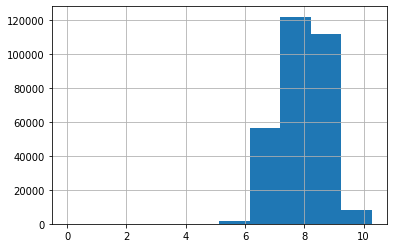

In [14]:
train.target.hist()

If we increase the number of bins we can realize that we have a bimodal distribution and it's not really well shaped. 
We could use some specific test to evaluate the normality of the variable and i'll leave some code later about  how to verify it.

<AxesSubplot:>

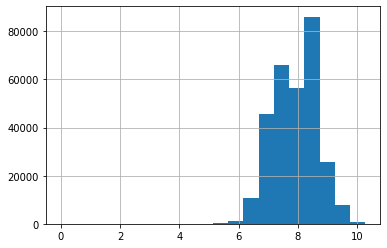

In [15]:
train.target.hist(bins =20)

With the nest command we can have a better idea using the distplot of which is the real shape of the distribution.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

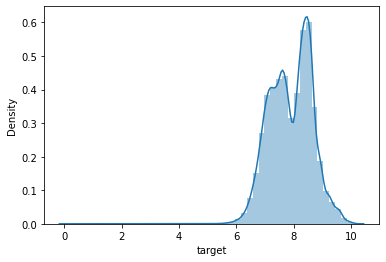

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train.target)

Check the normality of the curve
===
We want to see if the target variable is normally distributed and we can find inspiratio from this link triyng some useful tests of normality:
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In [17]:
from scipy import stats
a=train.target
a=np.array(a)
k2,p=stats.normaltest(a)

In [18]:
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


you can see more about this test (scipy.normaltest) on this link:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

OUTLIERS
===

To detect the outliers the best strategy is using the boxplots

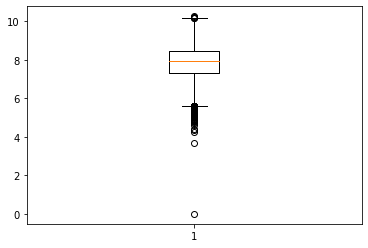

In [19]:
plt.boxplot(train.target)
plt.show()

In [20]:
train.target.describe()

count    300000.000000
mean          7.905661
std           0.733071
min           0.000000
25%           7.329367
50%           7.940571
75%           8.470084
max          10.267569
Name: target, dtype: float64

We didn't see before some ourliers in the distribution. There is a suspicious value of 0 for the target value that is probably an outlier. Let's check it out below the sorted extreme values.
We could in case cut this observation from the train data if we think it can affect our final prediction, just we should try to understand if is an aberrant value or a real outlie. The same with the extreme  values of the distribution. 
The dataset is aniway enough large so it shouldn't be a problem to cut the zero value and some extreme observations.

In [21]:
train.target.sort_values()

170514     0.000000
213614     3.700459
184298     4.256207
180587     4.346322
144979     4.417209
            ...    
103920    10.182292
87868     10.186179
285021    10.227541
113457    10.240003
263450    10.267569
Name: target, Length: 300000, dtype: float64

Dropping the outlier for the target variable
---

In [22]:
train.drop(index=170514,inplace=True)
train.target.min()

3.700458898458227

Outliers for the predictors
---
Now we can search the outliers in the the other variables.
With the block of code below we can simoultaneuosly control it for both the datasets and all the feature except the target variable.

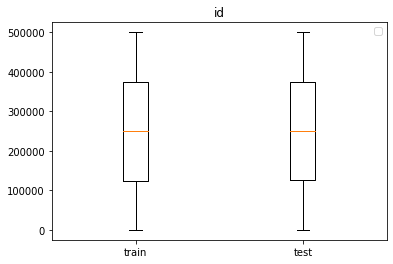

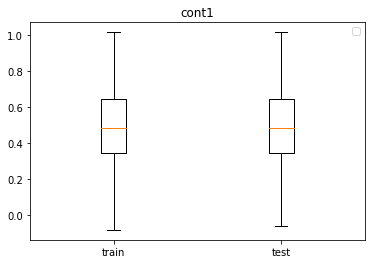

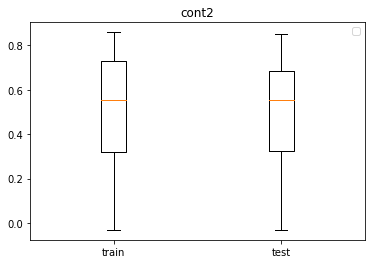

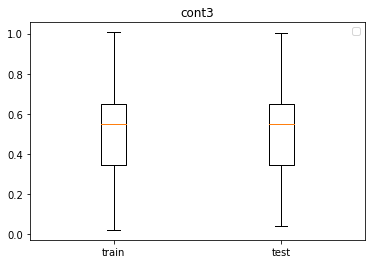

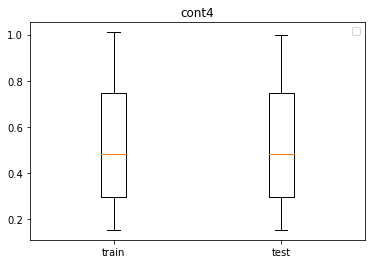

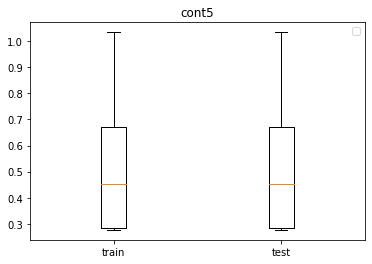

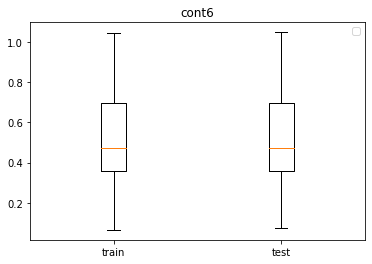

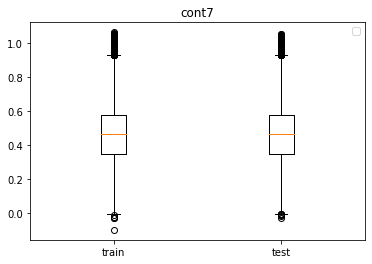

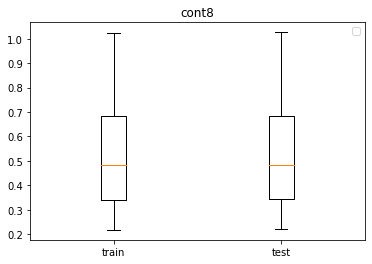

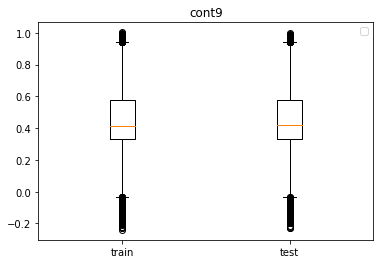

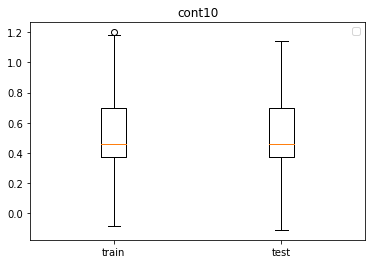

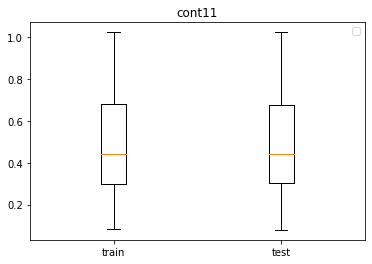

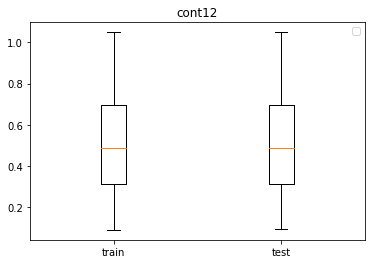

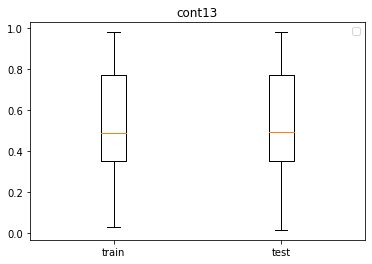

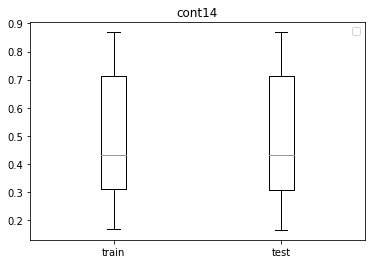

In [23]:
for col in train.columns[:-1]:
    plt.boxplot([train[col],test[col]], labels=['train', 'test'])
    plt.title(col)
    plt.legend()
    plt.show()

For this outliers treatment i took inspiration by the work of Gaurav Rajesh Sahani:
https://www.kaggle.com/code/gauravsahani/detailed-eda-with-lightgbm-score-0-698

In [24]:
Q1_train = train.quantile(0.25)
Q3_train = train.quantile(0.75)
IQR_train = train - Q1_train
((train < train - 1.5*IQR_train) | (train > Q3_train + 1.5*IQR_train)).agg([sum, 'mean'])

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
sum,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,0.250001,0.250001,0.250001,0.250001,0.250001,0.250001,0.250001,0.250001,0.250001,0.250001,0.250001,0.250001,0.250001,0.250001,0.250001,0.250001


****We can find outliers for the variables cont7 and cont9 as well as we saw for the target variable. One possible strategy could be to replace it with the median or the 1st quartile of the distribution or triyng to estimate it with a model of regression. For the moment we keep it invariate. Indeed the outliers when present are both in the train and in the test data. If i had outliers just in training data i'd drop that rows but it's not the case.

In [25]:
Q1_test = test.quantile(0.25)
Q3_test = test.quantile(0.75)
IQR_test = Q3_test - Q1_test
((test < Q1_test - 1.5 * IQR_test) | (test > Q3_test + 1.5 * IQR_test)).agg([sum, 'mean'])

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4244.00000,0.0,1054.00000,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02122,0.0,0.00527,0.0,0.0,0.0,0.0,0.0


We will create a function to remove the outliers:

In [26]:
def replace_outliers(data):
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        median_ = data[col].median()
        data.loc[((data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)), col] = median_
    return data

In [27]:
train=replace_outliers(train)

In [28]:
test=replace_outliers(test)

Multivariate analysis of the dataset
===
Let's start from t the correlations between the features.
We will check it by correlation matrix and heatmap for the train dataset.
We could visualize it with a simply line of comman (train.corr()) but if we want a more intuitive version of the correlation matrix we can add some detail about the style.

In [29]:
corr=train.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,1.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
cont1,-0.00,1.00,-0.08,-0.42,0.27,-0.06,0.70,0.34,0.37,0.79,0.73,0.57,0.60,0.57,0.07,-0.03
cont2,0.00,-0.08,1.00,0.33,-0.01,0.15,0.02,0.11,0.08,-0.05,0.04,0.13,0.09,0.02,0.02,0.07
cont3,0.00,-0.42,0.33,1.00,-0.33,0.06,-0.30,0.08,-0.31,-0.40,-0.29,-0.08,-0.10,-0.39,-0.07,0.06
cont4,0.00,0.27,-0.01,-0.33,1.00,0.12,0.15,-0.07,0.32,0.26,0.20,0.06,0.07,0.16,0.05,0.01
cont5,0.00,-0.06,0.15,0.06,0.12,1.00,-0.18,-0.23,0.01,-0.07,-0.10,-0.22,-0.19,-0.14,0.04,-0.00
cont6,-0.00,0.70,0.02,-0.30,0.15,-0.18,1.00,0.55,0.42,0.71,0.77,0.74,0.76,0.78,0.07,0.03
cont7,-0.00,0.34,0.11,0.08,-0.07,-0.23,0.55,1.00,0.18,0.35,0.46,0.64,0.63,0.37,-0.03,0.06
cont8,0.00,0.37,0.08,-0.31,0.32,0.01,0.42,0.18,1.00,0.43,0.36,0.30,0.32,0.48,0.10,0.01
cont9,0.00,0.79,-0.05,-0.40,0.26,-0.07,0.71,0.35,0.43,1.00,0.72,0.57,0.60,0.62,0.08,-0.01


We can cat the correlation matrix inside a heatmap with the use of masks

The first thing to look is the last row of the table. WE can observe any particularly strong correlation between thetarget variable and the other while we can observe many high correlations between the other continuous variable that can lead to a problem of multicollinearity in the data.
In the next cell we execute the command to highlights the correlations with the use of the heatmap

<Figure size 1008x576 with 0 Axes>

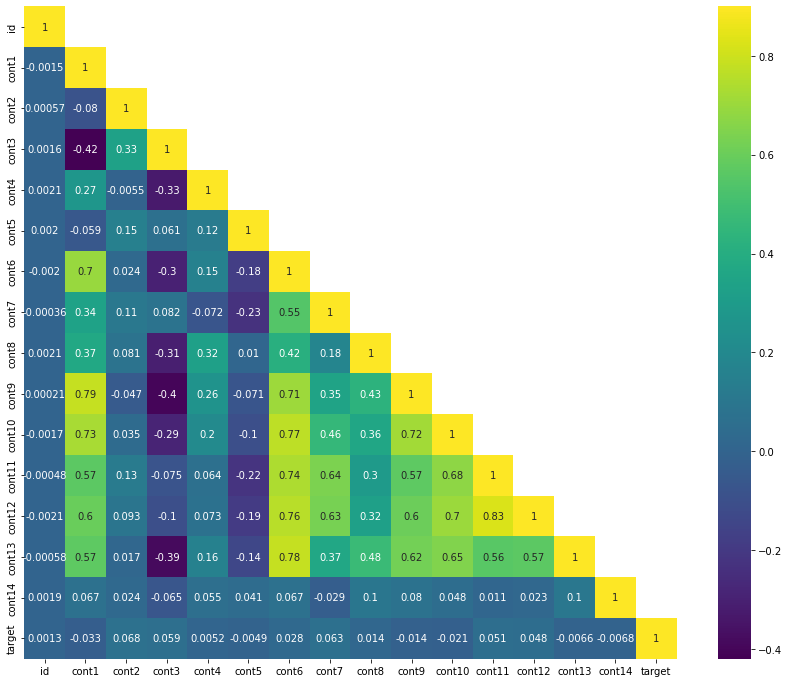

In [30]:
#we create a mask to visualize values just once
plt.figure(figsize=(14,8))
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)]=True

plt.subplots(figsize=(15,12))
sns.heatmap(train.corr(),mask=mask,vmax=0.9,cmap="viridis",annot=True, square =True)
plt.show()

This table show what we note before about the lack of strong correlation between target variable and the predictors

In [31]:
train.corr()[15:16].T

,target
id,0.001320
cont1,-0.033036
cont2,0.067734
cont3,0.059455
cont4,0.005241
cont5,-0.004924
cont6,0.027854
cont7,0.063319
cont8,0.014439
cont9,-0.014111


In [32]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

X=train.drop(["id"],axis=1)
y=train.target

I can drop the variable id that is not particularly significant in this case

In [33]:
train=train.drop("id",axis =1)

Some visualizations about the single variables
===

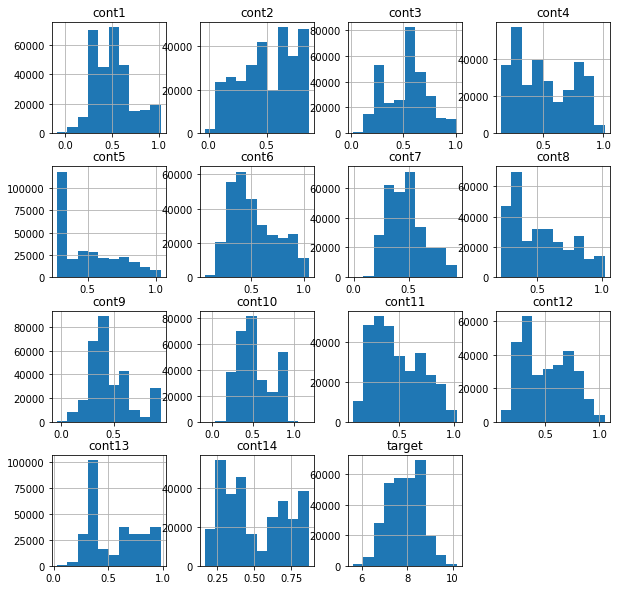

In [34]:
%matplotlib inline
train.hist(bins=10,figsize=(10,10))
plt.show()

In [35]:
train.skew()

cont1     0.529573
cont2    -0.248074
cont3     0.009042
cont4     0.250377
cont5     0.610300
cont6     0.537970
cont7     0.567601
cont8     0.569726
cont9     0.822600
cont10    0.362525
cont11    0.419383
cont12    0.283168
cont13    0.320344
cont14    0.252551
target   -0.056725
dtype: float64

Many variables has problem of skewness. We could make some transformation as well to solve this problem if we find it necessary. In the previous cell of describe method we didn't find particularly problem about the different magnitude of the features so we should scale the data but in this case the situations shouldn't change too much. 

Pairplot
---

In [36]:
#sns.pairplot(train)

Splitting the dataset for the validation
===

i want to create a categorical variable for the target with the aim to create a split of the dataset who proportionally represent the dataset

In [37]:
X.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [38]:
X=X.drop("target",axis=1)
X

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.216974,0.735265,0.648648,0.255387,0.616353,0.345197,0.295718,0.304357,0.314351,0.860504,0.315397,0.247682,0.486542,0.288750
299996,0.545799,0.165139,0.220966,0.190053,0.359362,0.386336,0.365767,0.344217,0.466446,0.454581,0.360251,0.360755,0.292535,0.619984
299997,0.284401,0.841542,0.957585,0.340383,0.396279,0.330376,0.525687,0.260039,0.378174,0.526925,0.491735,0.516629,0.173521,0.714552
299998,0.481900,0.622346,0.540032,0.823118,0.283066,0.434283,0.174342,0.710843,0.358690,0.648272,0.984647,1.001110,0.063956,0.377693


In [39]:
%matplotlib inline
#grr=pd.plotting.scatter_matrix(X[0:80],c=y[0:80],figsize=(15,10))
#plt.show()

In [40]:
X["cont5_13"]=X["cont5"]*X["cont13"]
X["cont7_10"]=X["cont7"]*X["cont10"]
X["cont1_5"]=X["cont1"]*X["cont5"]

test["cont5_13"]=test["cont5"]*test["cont13"]
test["cont7_10"]=test["cont7"]*test["cont10"]
test["cont1_5"]=test["cont1"]*test["cont5"]

In [41]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error

In [42]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=42)

The mean for the 2 splitted vector of y are similar

In [43]:
y_train.mean(),y_val.mean()

(7.906810314497354, 7.907395557104518)

In [44]:
y_train.describe()

count    209999.000000
mean          7.906810
std           0.731287
min           5.622994
25%           7.330906
50%           7.940339
75%           8.470164
max          10.177365
Name: target, dtype: float64

In [45]:
y_val.describe()

count    90000.000000
mean         7.907396
std          0.728749
min          5.620872
25%          7.329590
50%          7.944744
75%          8.469525
max         10.179714
Name: target, dtype: float64

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

Creating a function to evaluate the cross-validation score

In [47]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [48]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

With the command below we create a function that can help us to have an idea of the interpretation of the Linear Regression model and we will understand its utility soon.

In [49]:
def linearRegressionSummary(model, column_names):
    '''Show a summary of the trained linear regression model'''

    # Plot the coeffients as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle('Linear Regression Coefficients', fontsize=16)
    rects = plt.barh(column_names, model.coef_,color="lightblue")

    # Annotate the bars with the coefficient values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(0, rect.get_y()),
                    xytext=(0,2),  
                    textcoords="offset points",  
                    ha='left' if width<0 else 'right', va='bottom')        
    plt.show()

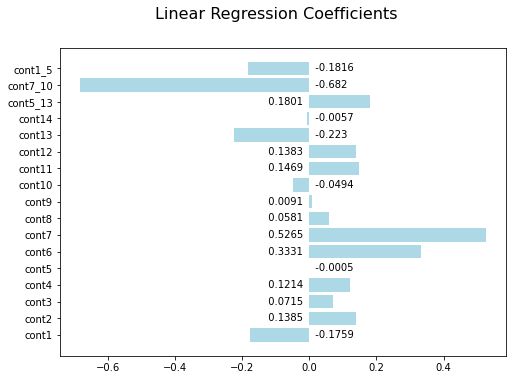

In [50]:
linearRegressionSummary(lr_model,X.columns)

We just used the previous function written above to have a visualization of the impact of the predictors in the Regression model. The ones with the bar on the left affected our prediction in negative way decreasing the value of the target ( in particular cont10 while the ones on the right influence the result in positive way increasing the value of the target (expecially cont6).
The more the bar is far from the centre the more the predictor has an influence in our model.

In [51]:
print(rmsle_cv(lr_model))
score=rmsle_cv(lr_model)
print("\nmodel score: {:.4f} {:.4f}\n".format(score.mean(),score.std()))

[0.7193942  0.7271344  0.7264512  0.72316501 0.72455043]

model score: 0.7241 0.0028



In [52]:
pred=lr_model.predict(X_val)

In [53]:
res_df = pd.DataFrame({
    'Actual': y_val, 
    'Predicted':pred
})

res_df


,Actual,Predicted
4941,8.950763,7.853385
51775,7.395528,7.957534
197579,9.612132,8.028069
299321,7.995399,7.965366
83925,7.593187,7.914760
...,...,...
130778,7.957543,7.970796
163374,7.318381,7.805500
250029,7.366644,7.718956
231404,8.183012,8.057192


We can have another view of our predictions with this cell of command

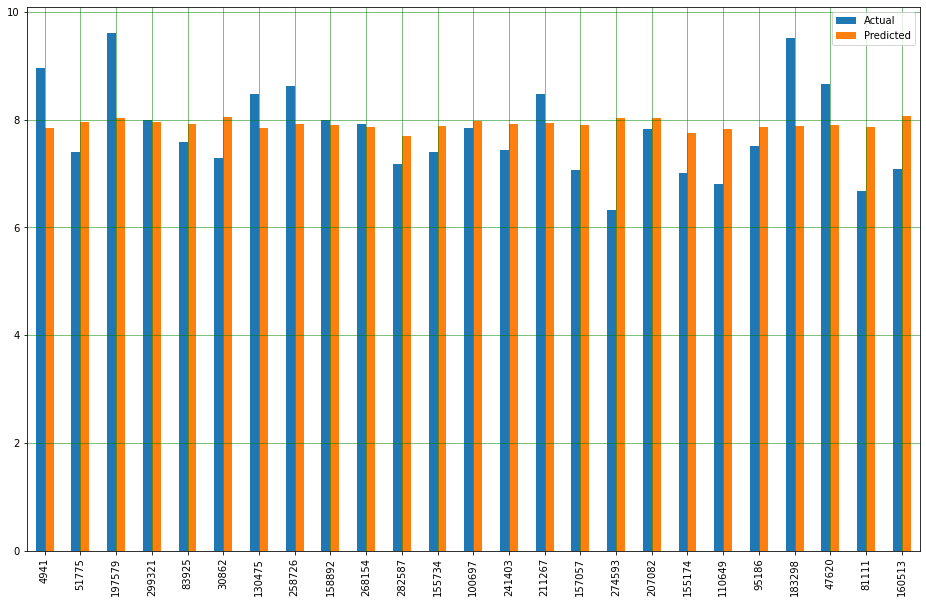

In [54]:
df1 = res_df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [55]:

test=test.drop("id",axis=1)
test.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cont5_13,cont7_10,cont1_5
0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515,0.081955,0.270457,0.101021
1,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002,0.276312,0.311726,0.273376
2,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941,0.092416,0.088614,0.050644
3,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166,0.083956,0.175151,0.100902
4,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275,0.223628,0.379469,0.094982


In [56]:
lr_model=LinearRegression()
lr_model.fit(X,y)
predictions=lr_model.predict(test)


In [57]:
predictions

array([8.07950975, 7.63222357, 7.94268178, ..., 7.87755882, 7.90927127,
       7.96575211])

In [58]:
print(lr_model.intercept_)
lr_model.coef_

7.544058151866096


array([-0.17397816,  0.14059249,  0.06993487,  0.12205454,  0.01888665,
        0.33760899,  0.53412269,  0.0535635 ,  0.01013293, -0.05209486,
        0.13789742,  0.14332989, -0.20041811, -0.00870875,  0.14310602,
       -0.70029134, -0.17552603])

In [59]:
output=pd.DataFrame({"id":id,"target":predictions})
output
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [60]:
output

,id,target
0,<built-in function id>,8.079510
1,<built-in function id>,7.632224
2,<built-in function id>,7.942682
3,<built-in function id>,7.956916
4,<built-in function id>,8.071447
...,...,...
199995,<built-in function id>,7.921801
199996,<built-in function id>,7.991346
199997,<built-in function id>,7.877559
199998,<built-in function id>,7.909271


1st little improving: Introducing scaling
===

In [61]:
#Let's try to use scaling on the same model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler


In [62]:
rs = RobustScaler()
rs.fit(X_train)
X_train_rs = pd.DataFrame(rs.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_rs = pd.DataFrame(rs.transform(X_val), columns=X_val.columns, index=X_val.index)
X_rs=pd.DataFrame(rs.transform(X), columns=X_val.columns, index=X.index)

X_train.shape, X_train_rs.shape, X_val.shape, X_val_rs.shape,X_rs.shape

((209999, 17), (209999, 17), (90000, 17), (90000, 17), (299999, 17))

In [63]:
X_train_rs.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cont5_13,cont7_10,cont1_5
119497,0.046768,-0.473609,0.544466,-0.115535,0.185232,0.040008,1.483992,-0.524669,0.003087,0.418086,0.743502,0.590001,-0.363854,0.475687,-0.365318,1.058577,0.205561
274740,-0.370127,-1.123764,-0.314515,0.792197,-0.149988,-0.635818,-0.286308,-0.556595,-0.322634,-0.757063,-0.636121,-0.603540,-0.408257,-0.439569,-0.655123,-0.624932,-0.408192
74908,0.035549,0.303926,-1.076868,0.979877,-0.126820,-0.341624,-0.628789,0.294508,-0.266550,-0.341020,-0.096730,-0.440942,-0.495661,-0.310758,-0.722667,-0.503200,-0.125298
11630,-0.498025,-0.310515,0.274157,-0.167356,0.795717,-0.852887,-0.374985,-0.642115,-0.391281,-0.315791,-0.585099,-0.716132,-0.413515,-0.302263,-0.003010,-0.404350,0.167828
216748,1.015998,-0.154062,-0.304909,0.716787,-0.437391,-0.623504,-1.263955,0.414753,-0.728326,0.534165,0.925370,-0.524426,-0.595026,-0.135111,-0.981828,-0.486348,0.004387


In [64]:
X_train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cont5_13,cont7_10,cont1_5
119497,0.498190,0.356345,0.717142,0.430421,0.523198,0.484992,0.796132,0.303520,0.417590,0.594613,0.724172,0.714432,0.336483,0.623864,0.176047,0.473391,0.260652
274740,0.372677,0.086148,0.455815,0.842037,0.393699,0.256223,0.403291,0.292568,0.338834,0.213075,0.201481,0.256038,0.317932,0.253853,0.125169,0.085931,0.146723
74908,0.494812,0.679479,0.223885,0.927142,0.402649,0.355809,0.327293,0.584529,0.352394,0.348153,0.405837,0.318485,0.281415,0.305928,0.113311,0.113948,0.199236
11630,0.334171,0.424125,0.634906,0.406922,0.759035,0.182745,0.383613,0.263232,0.322235,0.356344,0.220811,0.212795,0.315735,0.309362,0.239654,0.136698,0.253648
216748,0.789992,0.489145,0.458738,0.807842,0.282672,0.260392,0.186345,0.625777,0.240741,0.632301,0.793075,0.286422,0.239901,0.376937,0.067813,0.117826,0.223309


In [65]:
X_val_rs.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cont5_13,cont7_10,cont1_5
4941,0.117257,0.164077,0.364890,-0.602822,-0.360772,-0.201073,0.575613,-0.656638,0.028032,0.298832,-0.024039,-0.271331,-0.228407,0.081995,-0.668934,0.437766,-0.324829
51775,-0.785103,0.439747,0.061136,-0.583567,-0.438199,0.175776,-0.100391,0.076429,-0.488464,-0.070059,-0.086396,-0.313501,0.302073,0.440927,-0.379445,-0.155900,-0.821763
197579,-0.412588,0.310164,1.326077,-0.357897,0.352602,-0.363926,0.057126,-0.591455,-0.157877,-0.402573,0.105372,0.084977,-0.546613,-0.111637,-0.497069,-0.314588,-0.058877
299321,-0.017439,-0.614882,-0.201303,0.137158,-0.436292,0.707837,0.453566,-0.366384,0.063838,0.330484,0.669089,0.518680,0.646919,-0.333046,-0.144540,0.397690,-0.468308
83925,-1.122567,0.443051,0.263027,0.651237,-0.436285,-0.711148,-1.139313,0.162135,-1.060232,-0.604046,-0.385433,-0.737674,0.053312,-0.120792,-0.544450,-0.753981,-0.975723


In [66]:
X_val.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cont5_13,cont7_10,cont1_5
4941,0.519411,0.621359,0.662510,0.209457,0.312271,0.403386,0.594557,0.258249,0.423621,0.555895,0.433377,0.383627,0.393071,0.464706,0.122745,0.330511,0.162197
51775,0.247742,0.735924,0.570099,0.218188,0.282360,0.530950,0.444548,0.509719,0.298737,0.436126,0.409752,0.367431,0.614702,0.609812,0.173567,0.193879,0.069952
197579,0.359893,0.682071,0.954931,0.320520,0.587855,0.348260,0.479502,0.280610,0.378670,0.328168,0.482407,0.520471,0.260127,0.386427,0.152917,0.157357,0.211565
299321,0.478859,0.297634,0.490258,0.545006,0.283097,0.711054,0.567474,0.357818,0.432279,0.566171,0.695979,0.687040,0.758776,0.296917,0.214807,0.321288,0.135563
83925,0.146143,0.737297,0.631521,0.778118,0.283099,0.230724,0.214004,0.539120,0.160490,0.262755,0.296458,0.204522,0.510772,0.382725,0.144599,0.056231,0.041373


Further ideas to improve the model
===

There are some library that you could use to improve your model making some hyperparameter tuning like *optuna* for a specific model or trying to evaluate more model simoultaneously on the same dataset using the library *lazypredict*. 
feel free to try this 2 options for this dataset and evaluate the results.
for the moment i will use a pipeline for some of the best models available for this kind of problem like lightgbm,xgboost and random forest in general

In [67]:
from sklearn.pipeline import Pipeline
def get_model():
    pipe = Pipeline( steps=[
        ("regressor", None)
    ])
    return pipe

In [68]:
"""from sklearn.model_selection import  GridSearchCV
param_grid = {
    'regressor': [
        LinearRegression(),
        Ridge(alpha=0.5, random_state=42),
        Lasso(alpha=0.5, random_state=42),
        RandomForestRegressor(max_depth=5, random_state=42)
    ]
}

search = GridSearchCV(
    get_model(), 
    param_grid, 
    cv=KFold(n_splits=5, shuffle=True, random_state=123), 
    scoring="neg_mean_squared_error",
    return_train_score=True, 
    verbose=3
)
"""

'from sklearn.model_selection import  GridSearchCV\nparam_grid = {\n    \'regressor\': [\n        LinearRegression(),\n        Ridge(alpha=0.5, random_state=42),\n        Lasso(alpha=0.5, random_state=42),\n        RandomForestRegressor(max_depth=5, random_state=42)\n    ]\n}\n\nsearch = GridSearchCV(\n    get_model(), \n    param_grid, \n    cv=KFold(n_splits=5, shuffle=True, random_state=123), \n    scoring="neg_mean_squared_error",\n    return_train_score=True, \n    verbose=3\n)\n'

In [69]:
"""%%time
search.fit(X_rs, y)
"""

'%%time\nsearch.fit(X_rs, y)\n'

In [70]:
#search.best_estimator_

The result was:
Pipeline(steps=[('regressor',
                 RandomForestRegressor(max_depth=5, random_state=42))])

In [71]:
#search.best_score_

While the best result is obtained with the RandomForestRegressor i can decide to oveercome the problem of transformers because is not affected by problem of scaling so i'll apply on the X dataset. It doesn't mean that this is the best model in absolute... we could try something more extreeme like lightgbm as well , but it's the best between the four models tested for this problem.
We can still improve it using the GridSearchCV for the same model changing some parameters like the maximum depth or the number of leaf in the trees. 

RandomForestModel
===

In [72]:
"""lasso=make_pipeline(MinMaxScaler(),Lasso(alpha=0.0001,random_state=42))
print(rmsle_cv(lasso))
score=rmsle_cv(lasso)
print("\nmodel score: {:.4f} {:.4f}\n".format(score.mean(),score.std()))
"""

'lasso=make_pipeline(MinMaxScaler(),Lasso(alpha=0.0001,random_state=42))\nprint(rmsle_cv(lasso))\nscore=rmsle_cv(lasso)\nprint("\nmodel score: {:.4f} {:.4f}\n".format(score.mean(),score.std()))\n'

In [73]:
"""
rf_model=RandomForestRegressor(max_depth=5, random_state=42)
rf_model.fit(X,y)
predictions=rf_model.predict(test)
"""

'\nrf_model=RandomForestRegressor(max_depth=5, random_state=42)\nrf_model.fit(X,y)\npredictions=rf_model.predict(test)\n'

In [74]:
rf=RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [75]:
output=pd.DataFrame({"id":id,"target":predictions})
output
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [76]:
output

,id,target
0,<built-in function id>,8.079510
1,<built-in function id>,7.632224
2,<built-in function id>,7.942682
3,<built-in function id>,7.956916
4,<built-in function id>,8.071447
...,...,...
199995,<built-in function id>,7.921801
199996,<built-in function id>,7.991346
199997,<built-in function id>,7.877559
199998,<built-in function id>,7.909271


XGBRegressor
===

In [77]:
"""import xgboost
from xgboost import XGBRegressor
XGB=XGBRegressor(random_state=42)
XGB.fit(X,y)
predictions=XGB.predict(test)
predictions1=predictions
"""

'import xgboost\nfrom xgboost import XGBRegressor\nXGB=XGBRegressor(random_state=42)\nXGB.fit(X,y)\npredictions=XGB.predict(test)\npredictions1=predictions\n'

In [78]:
"""output=pd.DataFrame({"id":id,"target":predictions})
output
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")
"""

'output=pd.DataFrame({"id":id,"target":predictions})\noutput\noutput.to_csv(\'sample_submission.csv\', index=False)\nprint("Your submission was successfully saved!")\n'

We could try an Averaging model as well

In [79]:
output

,id,target
0,<built-in function id>,8.079510
1,<built-in function id>,7.632224
2,<built-in function id>,7.942682
3,<built-in function id>,7.956916
4,<built-in function id>,8.071447
...,...,...
199995,<built-in function id>,7.921801
199996,<built-in function id>,7.991346
199997,<built-in function id>,7.877559
199998,<built-in function id>,7.909271


In [80]:
predictions

array([8.07950975, 7.63222357, 7.94268178, ..., 7.87755882, 7.90927127,
       7.96575211])

In [81]:
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)
rmsle_cv(ridge_model)

array([0.71939442, 0.72713517, 0.72645109, 0.72316543, 0.72454894])

In [82]:
alphas = [ 1, 5, 10 ,12,13]
cv_ridge = [rmsle_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [83]:
cv_ridge

[0.7241390105993366,
 0.7241393273538239,
 0.7241405910367693,
 0.7241413170220672,
 0.7241417207575376]

In [84]:
pred_ridge=ridge_model.predict(test)

In [85]:
pred_ridge

array([8.08119964, 7.62857313, 7.94652187, ..., 7.87727507, 7.90339929,
       7.96133129])

Lightgbm
===

In [86]:
import lightgbm as lgb
LGB = lgb.LGBMRegressor(random_state=33, n_estimators=5000, min_data_per_group=5, boosting_type='gbdt',
 num_leaves=246, learning_rate=0.005, subsample_for_bin=200000,
 lambda_l1= 1.074622455507616e-05, lambda_l2= 2.0521330798729704e-06, n_jobs=-1, cat_smooth=1.0, 
 importance_type='split', metric='rmse', min_child_samples=20, min_gain_to_split=0.0, feature_fraction=0.5, 
 bagging_freq=6, min_sum_hessian_in_leaf=0.001, min_data_in_leaf=100, bagging_fraction=0.82063411)

LGB.fit(X_train, y_train)


[LightGBM] [Warning] bagging_fraction is set=0.82063411, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82063411
[LightGBM] [Warning] lambda_l1 is set=1.074622455507616e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.074622455507616e-05
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=2.0521330798729704e-06, reg_lambda=0.0 will be ignored. Current valu

LGBMRegressor(bagging_fraction=0.82063411, bagging_freq=6, cat_smooth=1.0,
              feature_fraction=0.5, lambda_l1=1.074622455507616e-05,
              lambda_l2=2.0521330798729704e-06, learning_rate=0.005,
              metric='rmse', min_data_in_leaf=100, min_data_per_group=5,
              min_gain_to_split=0.0, min_sum_hessian_in_leaf=0.001,
              n_estimators=5000, num_leaves=246, random_state=33)

I founded outside the parameters for this model

In [87]:
predictions=LGB.predict(test)

In [88]:
output=pd.DataFrame({"id":id,"target":predictions})
output
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


**And Finally....**
====

We can see in the graph below the incidence of the different features in the model

This idea was inspired by the Notebook of Imnaho:
https://www.kaggle.com/code/imnaho/eda-predict-with-lgbmclassifier

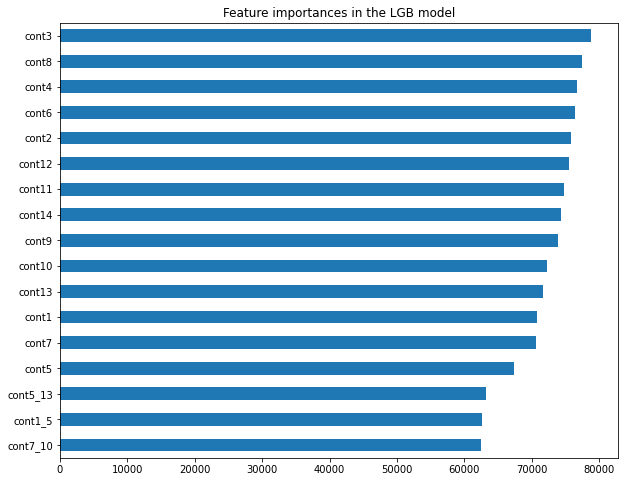

In [89]:
plt.figure(figsize=(10,8))

importances=pd.Series(LGB.feature_importances_,index=X.columns)
importances=importances.sort_values()
importances.plot(kind="barh")
plt.title("Feature importances in the LGB model")
plt.show()


In [90]:
X_train_rs.shape,X_val_rs.shape,y_train.shape,y_val.shape

((209999, 17), (90000, 17), (209999,), (90000,))